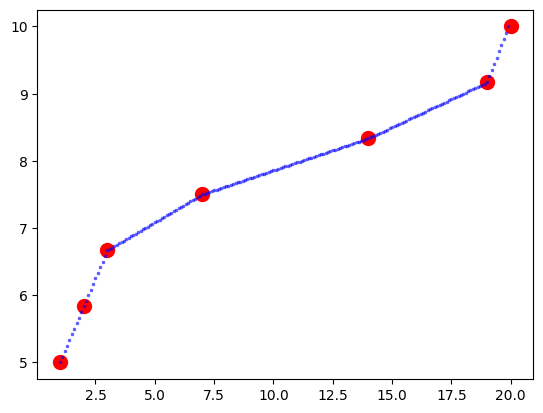

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def min_value(x):
    min_x = np.zeros(len(x)-1)
    for ii, x_i in enumerate(x[:-1]):
        min_x[ii] = abs(x[ii+1] - x[ii])
    dx = np.min(min_x)
    return dx


def interpolation(x,y):
    dx = min_value(x) 
    x_final = np.array([])
    y_final = np.array([])
    for ii, x_i in enumerate(x[:-1]):
        x_new = np.arange(x[ii],x[ii+1],dx/10)
        if ii >= len(x) - 2 :
            y_new = np.linspace(y[ii],y[ii+1],len(x_new))
        else :
            y_new = np.linspace(y[ii],y[ii+1],len(x_new),endpoint=False)
        x_final = np.append(x_final,x_new)
        y_final = np.append(y_final,y_new)
    return x_final, y_final

x=np.array([1,2,3,7,14,19,20])
y = np.linspace(5,10,7)

x_n, y_n = interpolation(x,y)
plt.plot(x, y, 'ro', ms=10)  # 점 크기를 설정 (markersize 또는 ms 사용 가능)
plt.plot(x_n, y_n, 'bs', alpha=0.5, markersize=2)



# Interpolation to Data

In [17]:
x = pd.read_csv('/home/jin/바탕화면/CIV_emissivity.txt',sep='\t',header=0)
radius,emiss= x['Radius_kpc'].to_numpy(), x['Emissivity'].to_numpy()
r_new, em_new = interpolation(radius,emiss)

In [ ]:
plt.plot(r_new,em_new)
plt.yscale('log')

x = 1
dx = 0.05 

y = np.where((r_new>= x-dx) & (r_new<= x+dx))[0]
em_new[y].mean()

Radius =  5 kpc
Mean Emissivity=  4.6562151459382845e-29 erg/cm3/s


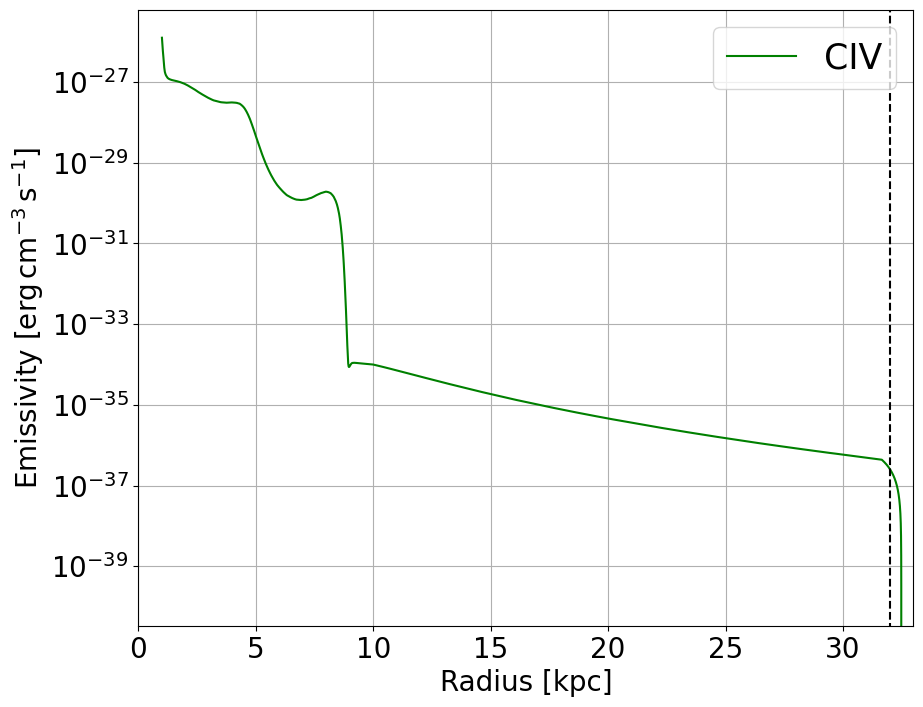

In [24]:
fig = plt.figure(1,figsize=(10,8))

x = 5
dx = 0.05 

y = np.where((r_new>= x-dx) & (r_new<= x+dx))[0]
y_emis = em_new[y].mean()

print('Radius = ', x, 'kpc')
print('Mean Emissivity= ', y_emis, 'erg/cm3/s')
x_max = r_new[np.where(em_new==0)[0].min()]

plt.plot(r_new,em_new,'g',label='CIV')
plt.yscale('log')
plt.axvline(x=32,ymin=-1,ymax=1,linestyle='--',color='k')
plt.xlim(0,33)
plt.xlabel('Radius [kpc]', fontsize=20)
plt.ylabel(r'Emissivity [$\rm erg\,cm^{-3}\,s^{-1}$]', fontsize=20)
# ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.grid(True)
plt.legend(loc='upper right',fontsize=25)